# Informe de Análisis VII

El objetivo ahora es continuar explorando el Conjunto de Datos para ver si encontramos problemas que puedan perjudicar los resultados futuros

## Creando Agrupamientos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('datos/alquiler_residencial.csv', sep = ';')

In [3]:
datos.head(10)

,Unnamed: 0,Tipo,Barrio,Cuartos,Nro_Estacionamiento,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
6,7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
7,9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
8,10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
9,11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


#### https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

In [21]:
# Calculando la media de la columna 'Valor'
datos['Valor'].mean()

6432.60027832351

In [22]:
# Seleccionamos algunos barrios
barrios = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
seleccion = datos['Barrio'].isin(barrios)
datos = datos[seleccion]

In [8]:
# Solo los barrios seleccionados estarán en nuestra lista
datos['Barrio'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Barrio, dtype: object

In [23]:
# Agrupamos la información por Barrio
grupo_barrio = datos.groupby('Barrio')

In [11]:
# Esta variable es del tipo 'DataFrameGroupBy'
type(grupo_barrio)

pandas.core.groupby.generic.DataFrameGroupBy

``DataFrameGroupBy`` tiene una propiedad llamada ``groups``, que consiste en un diccionario donde la clave es una variable utilizada como indexador y los índices donde se encontraron los registros de *barrio*. De esta forma, se crea una indexación del *DataFrame* para facilitar las consultas y la creación de tablas.

In [12]:
grupo_barrio.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

In [24]:
# podemos visualizar los barrios
for barrio, dados in grupo_barrio: 
    print(barrio)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [25]:
# extraemos el valor medio en base a la lista de barrios
for barrio, data in grupo_barrio:
    print('{} -> {}'.format(barrio, data.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [14]:
grupo_barrio[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Barrio,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [26]:
# Podemos visualizar un resumen estadístico utilizando 'describe()'
grupo_barrio['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Barrio,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [27]:
# agregamos funciones de resumen para la variable 'Valor'
grupo_barrio['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Barrio,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [28]:
# Visualizando
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Medio del Alquiler por Barrio')

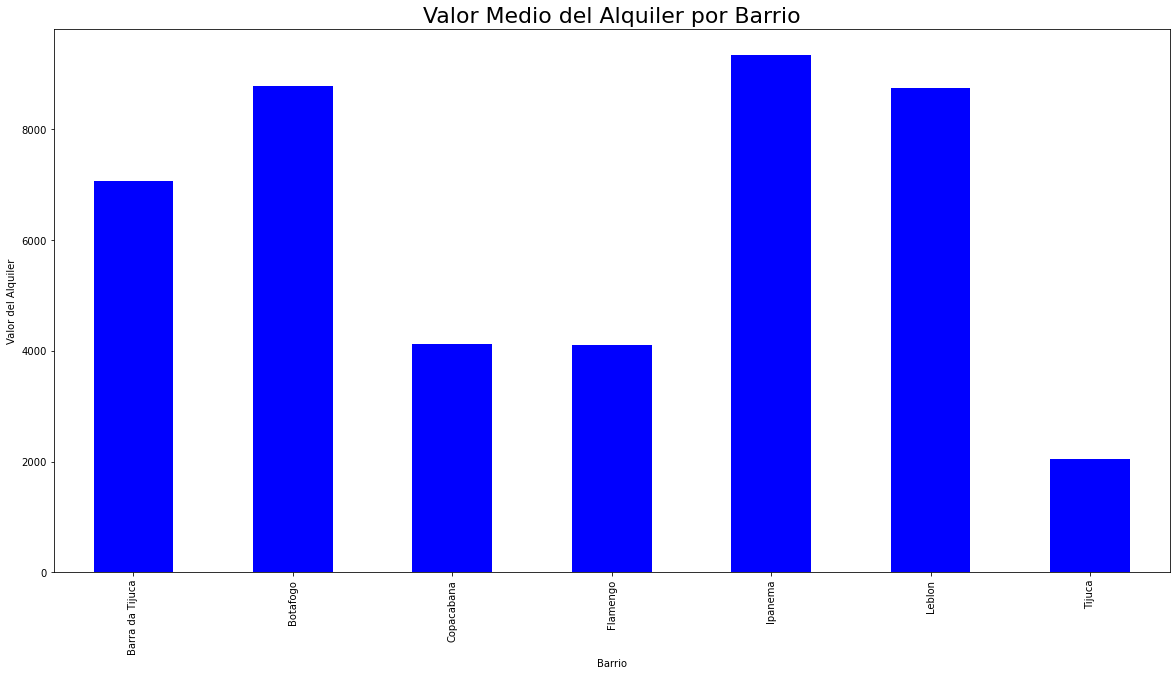

In [30]:
fig = grupo_barrio['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor del Alquiler')
fig.set_title('Valor Medio del Alquiler por Barrio', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Medio del Alquiler por Barrio')

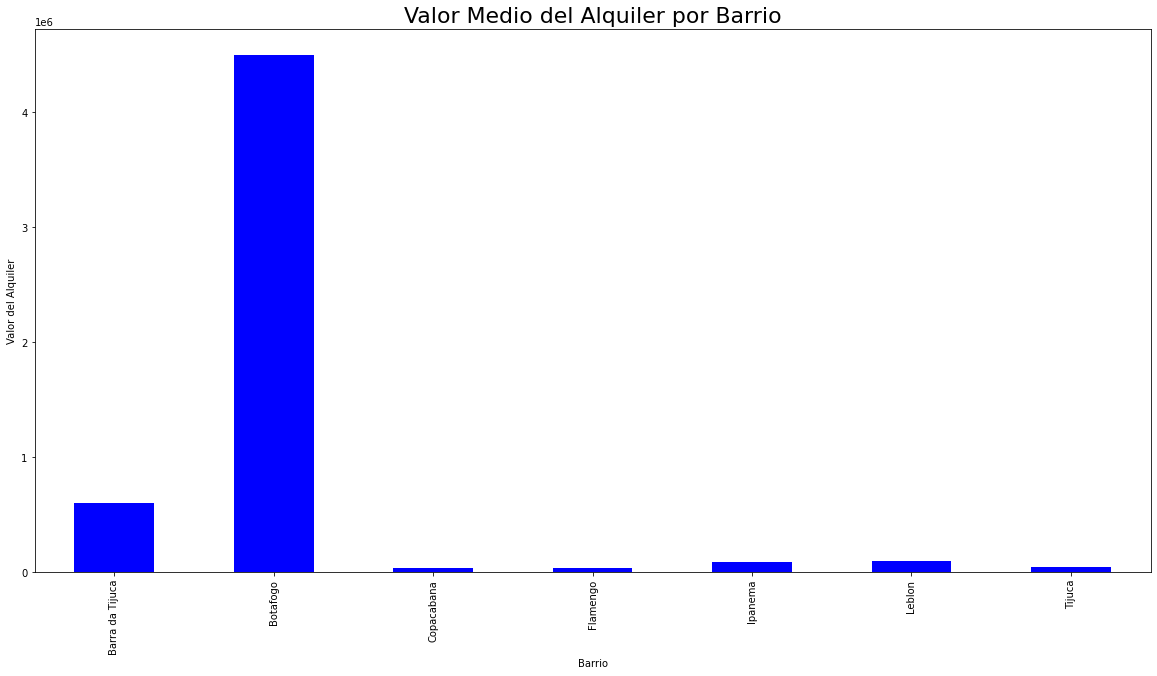

In [29]:
fig = grupo_barrio['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor del Alquiler')
fig.set_title('Valor Medio del Alquiler por Barrio', {'fontsize': 22})